In [6]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [7]:
%matplotlib inline

In [8]:
import scipy.spatial

In [108]:
def generate_points(coord_min,coord_max,n):
    '''generates n points in 3 clusters'''
    n_3 = n // 3
    coord_r = coord_max - coord_min
    
    A1 = np.random.uniform(coord_min,coord_min +coord_r/3,(n_3,2))
    A2 = np.random.uniform(coord_max - coord_r/3,coord_max,(n_3,2))

    A3_x = np.random.uniform(coord_min,coord_min + coord_r/3,n_3)[:,np.newaxis]
    A3_y = np.random.uniform(coord_max - coord_r/ 3,coord_max,n_3)[:,np.newaxis]
    A3 = np.hstack([A3_x,A3_y])

    return np.vstack([A1,A2,A3])

def generate_initial_mean(A,k):
    '''randomly choose first guess of k means'''
    ind = np.random.choice(A.shape[0],k,replace=False)
    return A[ind]
    
def draw_points_with_means(A,sample):
    '''draw scatter points with mean for each cluster'''
    colors = np.array(["#FF0000","#00FF00", "#0000FF", "#F0F0FF"])
    plt.scatter(A[:,0],A[:,1]);
    plt. scatter(sample[:,0],sample[:,1] ,s=500,alpha=0.4);

In [109]:
def k_means_clustering(A,sample,delta):
    '''find k-means for each cluster
    algorithm keeps converge untill RMS error is higher than delta'''
    
    sample_first = sample.copy()
    RMS = A.max() - A.min()
    count = 0
    
    while RMS > delta: 
        count = count + 1

        dist = scipy.spatial.distance.cdist(A,sample,'sqeuclidean')
        nearest = np.argsort(dist,axis=1)

        sample_new = np.empty((sample.shape[0],sample.shape[1]))

        for gr in range(len(sample)):
            flag = (nearest[:,0] == gr)[:,np.newaxis]
            if np.sum(flag) == 0:
                sample_new[gr,:] = sample[gr,:]
                continue
            sample_new[gr,:] = np.sum(A * flag,axis = 0) / np.sum(flag)
        RMS = np.sum(np.sum((sample_new - sample) ** 2,axis = 1)) / sample.shape[0]
        #print(RMS)
        sample[:,:] = sample_new[:,:]
        
    return sample,RMS,count

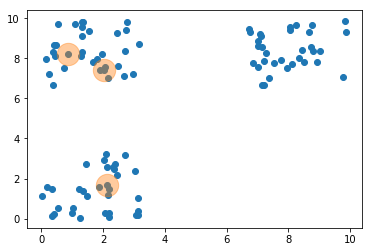

In [122]:
points = generate_points(0,10,100)
sample = generate_initial_mean(points,3)
draw_points_with_means(points,sample)

Final RMS error : 0.0
Algorithm has converged in 3 iteration


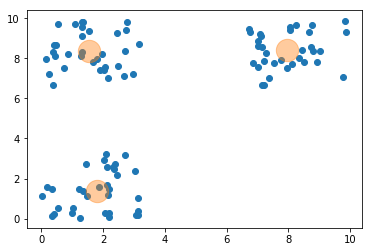

In [123]:
sample_new,RMS,iter_nmb = k_means_clustering(points,sample,0.01)
draw_points_with_means(points,sample_new)
print('Final RMS error : {}'.format(RMS))
print('Algorithm has converged in {} iteration'.format(iter_nmb))